# Practice: Histograms and Bar Charts

### Histograms
Start by importing the packages you'll be needing. We will be loading in some datasets from the `seaborn` package, so be sure to import that as well.

In [0]:
# import needed packages (numpy, matplotlib.pyplot, seaborn)
# don't forget the command you need for showings plots within the notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [0]:
# import the flights and titanic datasets from seaborn
flights = seaborn.load_dataset("flights")
titanic = seaborn.load_dataset("titanic")


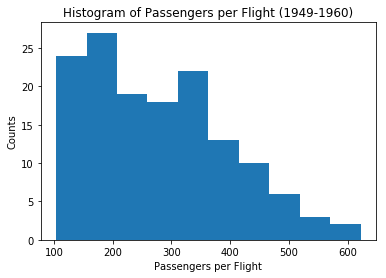

In [3]:
# plot a histogram of the passengers variable from the flights dataset
# dont forget your axis labels and titles!
plt.hist(flights.passengers)

plt.xlabel ("Passengers per Flight")
plt.ylabel("Counts")
plt.title("Histogram of Passengers per Flight (1949-1960)")
plt.show()

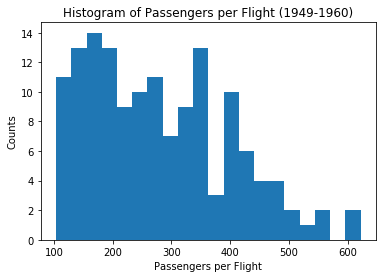

In [4]:
# play with the bins parameter to get a better idea of the disitribution
plt.hist(flights.passengers, bins = 20)

plt.xlabel ("Passengers per Flight")
plt.ylabel("Counts")
plt.title("Histogram of Passengers per Flight (1949-1960)")
plt.show()

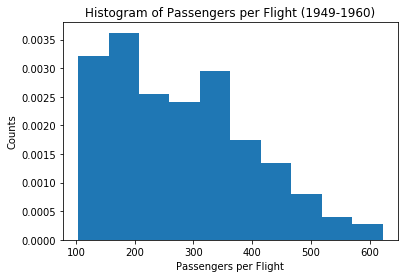

In [5]:
# now change the plot to show the percentage of values that fall in each bin
plt.hist(flights.passengers, density=True)

plt.xlabel ("Passengers per Flight")
plt.ylabel("Counts")
plt.title("Histogram of Passengers per Flight (1949-1960)")
plt.show()

### Bar Charts

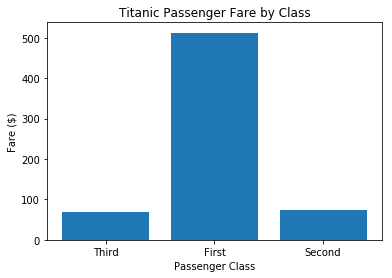

In [6]:
# plot a bar chart of class vs fare in the titanic dataset
# don't forget your labels and title!
plt.bar(titanic['class'], titanic.fare)

plt.xlabel("Passenger Class")
plt.ylabel("Fare ($)")
plt.title ("Titanic Passenger Fare by Class")
plt.show()

Does this plot look as we would expect? Probably not. First, the classes are not in a logical order - we want them to go from least to most. Second, look at the y-axis - what is being plotted here?

When we try to map several rows of values in our pandas dataframe to a single x-axis variable in our bar chart, python automatically plots the **sum** of the y-axis value. This can be useful in some cases, but in our case it probably makes more sense to compare the **means** of the fares across our three passenger class groups. 

Let's work to solve these problems.

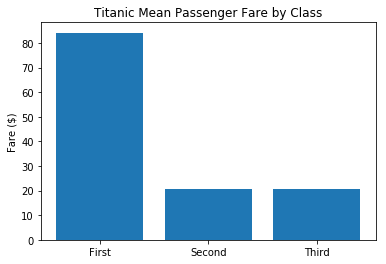

In [7]:
# create a vector mean_fares of the mean fare price for each of our passenger class groups
# HINT 1: think back to our lesson in subsetting dataframes in pandas
# HINT 2: for the first class value, we want to apply the np.mean() function on titanic['fare'] WHERE titanic['class'] equals 'First'
# HINT 3: be sure to add the values to the vector in the proper order
mean_fares = (np.mean(titanic.fare[titanic.pclass == 1]), np.mean(titanic.fare[titanic.pclass == 2]),
              np.mean(titanic.fare[titanic.pclass == 2]))


# create a vector class_names with our class names in the proper order
class_names = ("First", "Second", "Third")

# create vector idxs with the numeric x-index values
# HINT: look back to lesson if you dont remember how to get this
idxs = np.arange(len(class_names))

plt.bar(idxs, mean_fares)

plt.ylabel('Fare ($)')
plt.title('Titanic Mean Passenger Fare by Class')
plt.xticks(idxs, class_names)
plt.show()

Now, let's compare the mean fare price per group between men and women. From the lesson, we know the best way to plot this is to plot the male and female bars next to eachother on the same graph. 

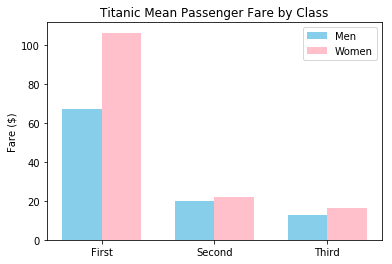

In [8]:
# create a vector mean_fares_m of the mean fare price for men for each of our passenger class groups
# HINT: to subset by two colums we do the following:
#         df['column1'][(df['column2'] == 1) & (df['column3'] == 'a')]
# this reads: grab column1 FROM df WHERE column2 equals 1 AND column3 equals 'a'
mean_fares_m = (np.mean(titanic.fare[(titanic.pclass == 1) & (titanic.sex == 'male')]),
                 np.mean(titanic.fare[(titanic.pclass == 2) & (titanic.sex == 'male')]),
                 np.mean(titanic.fare[(titanic.pclass == 3) & (titanic.sex == 'male')]))

# create a vector mean_fares_f using the same strategy
mean_fares_f = (np.mean(titanic.fare[(titanic.pclass == 1) & (titanic.sex == 'female')]),
                 np.mean(titanic.fare[(titanic.pclass == 2) & (titanic.sex == 'female')]),
                 np.mean(titanic.fare[(titanic.pclass == 3) & (titanic.sex == 'female')]))


# create variable that sets the width of each bar
width = 0.35

# plot mens bars on left side of the x-tick
# change color to 'SkyBlue'
# add appropriate label 
plt.bar(idxs-width/2, mean_fares_m, width, color = 'SkyBlue', label = 'Men')

# plot womens bars on the right side of the x-tick
# change color to 'Pink'
# add appropriate label
plt.bar(idxs+width/2, mean_fares_f, width, color = 'Pink', label = 'Women')

plt.ylabel('Fare ($)')
plt.title('Titanic Mean Passenger Fare by Class')
plt.xticks(idxs, class_names)
plt.legend()
plt.show()

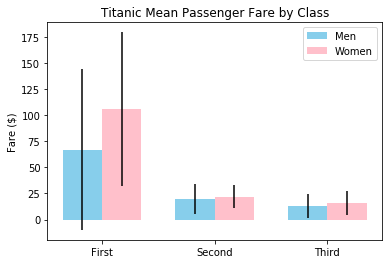

In [9]:
# EXTRA
# compute standard deviation for both the male and female fares in each class
std_fares_m = (np.std(titanic.fare[(titanic.pclass == 1) & (titanic.sex == 'male')]),
                 np.std(titanic.fare[(titanic.pclass == 2) & (titanic.sex == 'male')]),
                 np.std(titanic.fare[(titanic.pclass == 3) & (titanic.sex == 'male')]))
std_fares_f = (np.std(titanic.fare[(titanic.pclass == 1) & (titanic.sex == 'female')]),
                 np.std(titanic.fare[(titanic.pclass == 2) & (titanic.sex == 'female')]),
                 np.std(titanic.fare[(titanic.pclass == 3) & (titanic.sex == 'female')]))

# reproduce the bar plot from above with error bars corresponding to these standard deviations
plt.bar(idxs-width/2, mean_fares_m, width, yerr = std_fares_m, color = 'SkyBlue', label = 'Men')
plt.bar(idxs+width/2, mean_fares_f, width, yerr = std_fares_f, color = 'Pink', label = 'Women')

plt.ylabel('Fare ($)')
plt.title('Titanic Mean Passenger Fare by Class')
plt.xticks(idxs, class_names)
plt.legend()
plt.show()